In [45]:
# brute force calculation of the special functions that are defined by terms
# k^n/(n!sqrt(n))
# k^n/(n!n))
# k^n/(n!sqrt(n)^3)

In [1]:
import Pkg
Pkg.add("SpecialFunctions")
Pkg.add("PyPlot")

In [2]:
kk = range(BigFloat(0),stop=BigFloat(500),length=1000)

1000-element LinRange{BigFloat}:
 0.0,0.500501,1.001,1.5015,2.002,…,497.998,498.498,498.999,499.499,500.0

In [3]:
function onedimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/sqrt(BigFloat((i-1)*2+1))
    end
    return result
end

function onedreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/sqrt(BigFloat(2*i))
    end
    return result
end

onedreal (generic function with 1 method)

In [4]:
function twodimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/BigFloat((i-1)*2+1)
    end
    return result
end

function twodreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/BigFloat(2*i)
    end
    return result
end

twodreal (generic function with 1 method)

In [5]:
function threedimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/sqrt(BigFloat((i-1)*2+1))^3
    end
    return result
end

function threedreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/sqrt(BigFloat(2*i))^3
    end
    return result
end

threedreal (generic function with 1 method)

In [6]:
setprecision(BigFloat,3000)
onedrealk = onedreal.(kk,1000)
onedimagk = onedimag.(kk,1000)
twodrealk = twodreal.(kk,1000)
twodimagk = twodimag.(kk,1000)
threedrealk = threedreal.(kk,1000)
threedimagk = threedimag.(kk,1000)


1000-element Vector{BigFloat}:
 0.0
 0.49650239650603230781571080292808417694766090500606447243060617768257581752353510948463811462200201645094566666919548360034041153455243757985884480605191438004988117635998902659065825340279409646265243222656551938671372830491400841741340591320349327187709443633786270978646985571886170283719514043291279272960186730908986261479065324432527572310779308796514155080442710269025780747967580587159070313097543176724745584875340121813689792720860624819138143821325408251119471406431500498814821694452955582923698870586844960915783790237792651865438325163014338019129746861526617334892679481627081923647826998763251149459349304753373646259266983949323656643152961204186438394881952046476118137464260278344533404984757763626168837017394212254690760891836562595310761341593388073900520924423354437294237958469205918580249087074409660787935296063083481730331461516708104776133784253768169013736465883989222891449881
 0.9695679759327485006078231988001805671563133594303835

In [7]:
onedrealkf = convert(Array{Float64}, onedrealk)
onedimagkf = convert(Array{Float64}, onedimagk)
twodrealkf = convert(Array{Float64}, twodrealk)
twodimagkf = convert(Array{Float64}, twodimagk)
threedrealkf = convert(Array{Float64}, threedrealk)
threedimagkf = convert(Array{Float64}, threedimagk)
kf = convert(Array{Float64}, kk)

1000-element Vector{Float64}:
   0.0
   0.5005005005005005
   1.001001001001001
   1.5015015015015014
   2.002002002002002
   2.5025025025025025
   3.003003003003003
   3.5035035035035036
   4.004004004004004
   4.504504504504505
   5.005005005005005
   5.505505505505505
   6.006006006006006
   ⋮
 494.4944944944945
 494.994994994995
 495.4954954954955
 495.995995995996
 496.4964964964965
 496.996996996997
 497.4974974974975
 497.99799799799797
 498.4984984984985
 498.998998998999
 499.4994994994995
 500.0

In [17]:
using DelimitedFiles
writedlm("oned_realkf.csv",  onedrealkf, ',')
writedlm("oned_imagkf.csv",  onedimagkf, ',')
writedlm("twod_realkf.csv",  twodrealkf, ',')
writedlm("twod_imagkf.csv",  twodimagkf, ',')
writedlm("threed_realkf.csv",  threedrealkf, ',')
writedlm("threed_imagkf.csv",  threedimagkf, ',')

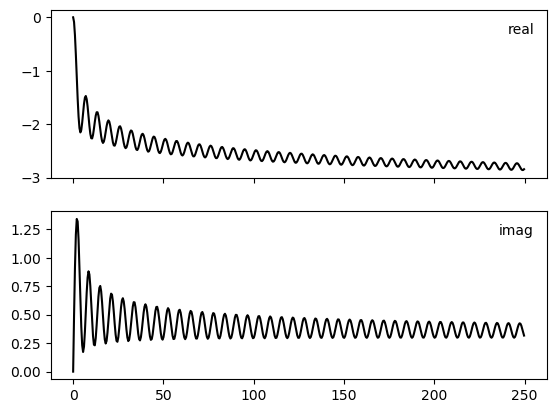

In [13]:
using PyPlot
lastidx = 500
cf, caxs = subplots(nrows=2,ncols=1,sharex=true)
ax = caxs[1]
ax.plot(kf[1:lastidx],onedrealkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("real", loc=1,frameon=false)
ax.add_artist(anchored_text)
ax = caxs[2]
ax.plot(kf[1:lastidx],onedimagkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("imag", loc=1,frameon=false)
ax.add_artist(anchored_text)
cf.savefig("oneD_final.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")
cf.savefig("oneD_final.pdf",format="pdf",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

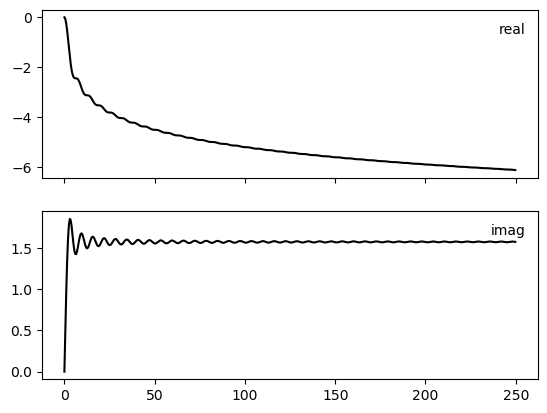

In [14]:
cf, caxs = subplots(nrows=2,ncols=1,sharex=true)
ax = caxs[1]
ax.plot(kf[1:lastidx],twodrealkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("real", loc=1,frameon=false)
ax.add_artist(anchored_text)
ax = caxs[2]
ax.plot(kf[1:lastidx],twodimagkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("imag", loc=1,frameon=false)
ax.add_artist(anchored_text)
cf.savefig("twoD_final.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")
cf.savefig("twoD_final.pdf",format="pdf",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")

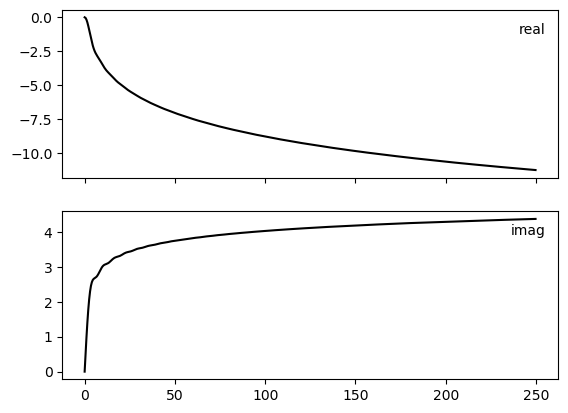

In [15]:
cf, caxs = subplots(nrows=2,ncols=1,sharex=true)
ax = caxs[1]
ax.plot(kf[1:lastidx],threedrealkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("real", loc=1,frameon=false)
ax.add_artist(anchored_text)
ax = caxs[2]
ax.plot(kf[1:lastidx],threedimagkf[1:lastidx],color="k")
anchored_text = matplotlib.offsetbox.AnchoredText("imag", loc=1,frameon=false)
ax.add_artist(anchored_text)
cf.savefig("threeD_final.png",format="png",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")
cf.savefig("threeD_final.pdf",format="pdf",dpi=300,bbox_inches="tight",facecolor="white",backgroundcolor="white")